In [1]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.gridspec as gridspec
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

def print_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    

I will try diffrent techniques to predict if someone could surive or not

In [2]:
link_to_data = "train.csv"
dataset = pd.read_csv(link_to_data)

| Column        | Description                                                                                           |
|---------------|-------------------------------------------------------------------------------------------------------|
| PassengerId   | Unique ID                                                                                             |
| Survived      | Survival status (0 = No, 1 = Yes)                                                                     |
| Pclass        | Passenger class (1 = First, 2 = Second, 3 = Third)                                                    |
| Name          | Name of passenger                                                                                     |
| Sex           | Gender of passenger                                                                                   |
| Age           | Age of passenger                                                                                      |
| SibSp         | Number of siblings and spouses aboard the Titanic                                                     |
| Parch         | Number of children and parents aboard the Titanic                                                     |
| Ticket        | Unique ticket ID                                                                                      |
| Fare          | Fare price paid (in pounds)                                                                           |
| Cabin         | Passenger's cabin number                                                                              |
| Embarked      | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## Date preparation

In [3]:
print(dataset.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In 3 of 12 columns there are missing values: Age - 177 values, Cabin - 687 columns, Embarked - 2. The most missing values has Cabin value.

In [4]:
print(dataset["Cabin"].unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


At the beginning I delete this column from dataset.
In case of Age and Fare column I delete only rows with missing values.
Now dataset contains 11 columns with 712 rows.

In [5]:
dataset.drop(columns="Cabin", inplace=True)
dataset.dropna(axis=0, inplace=True)

Next I will check if categorical column are correct

In [6]:
dataset.nunique()

PassengerId    712
Survived         2
Pclass           3
Name           712
Sex              2
Age             88
SibSp            6
Parch            7
Ticket         541
Fare           219
Embarked         3
dtype: int64

Changing categorical columns using One-hot encoding.
Use copy to be sure that data in original table will not be modified during working with X and y tables

In [7]:
y = dataset['Survived'].copy()
X = dataset[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].copy()
dummies_s = pd.get_dummies(dataset['Sex'])
dummies_e = pd.get_dummies(dataset['Embarked'])
X = pd.concat([X, dummies_e, dummies_s], axis=1)
X = X.astype(int)
X

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,3,22,1,0,7,0,0,1,0,1
1,1,38,1,0,71,1,0,0,1,0
2,3,26,0,0,7,0,0,1,1,0
3,1,35,1,0,53,0,0,1,1,0
4,3,35,0,0,8,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,3,39,0,5,29,0,1,0,1,0
886,2,27,0,0,13,0,0,1,0,1
887,1,19,0,0,30,0,0,1,1,0
889,1,26,0,0,30,1,0,0,0,1


Splitting the data into training and test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

Scaling the data that evey feature have mean 0 and standard deviation 1.
Scaling after splitting the data prevents information leakage into model.

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic regression

0.780373831775701


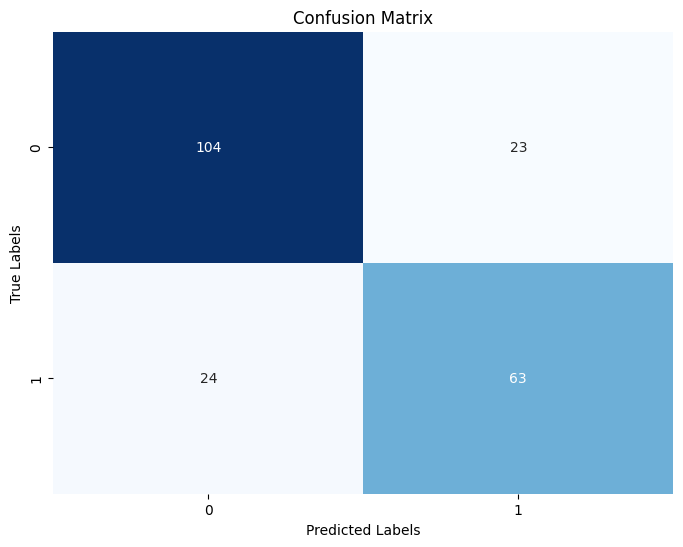

In [10]:
lr = LogisticRegression(random_state=41)
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_predict)
print(accuracy_score(y_test, y_predict))
# print(lr.score(X_test, y_test))
print_confusion_matrix(cm_lr)

<Axes: >

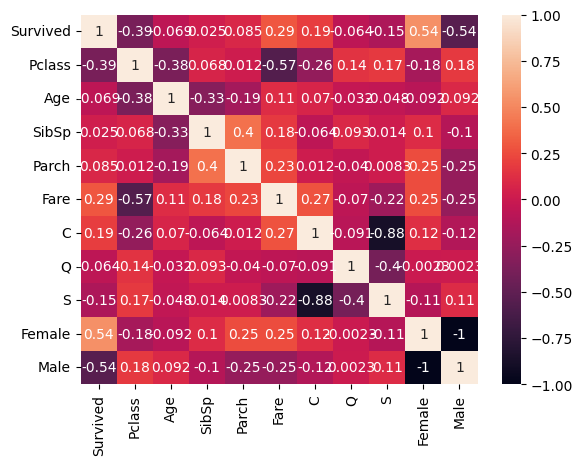

In [11]:
# pd.DataFrame(X_train).corrwith(pd.Series(y_train))
training_set = np.c_[y_train, X_train]
training_set = pd.DataFrame(training_set, 
                            columns=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', "C", "Q", "S", "Female", "Male"])
corr_matrix = training_set.corr()
sns.heatmap(corr_matrix, annot=True)

Looking at the correlation matrix, which is printed above, I will look how Logistic Regression work, when I give it only two features, with the biggest correlation(Female and Pclass). Beyond that looking at the correlation I see that variables, apart from the created gender and port variables, are not correlated with each other above 0.60.

0.8142818354602227


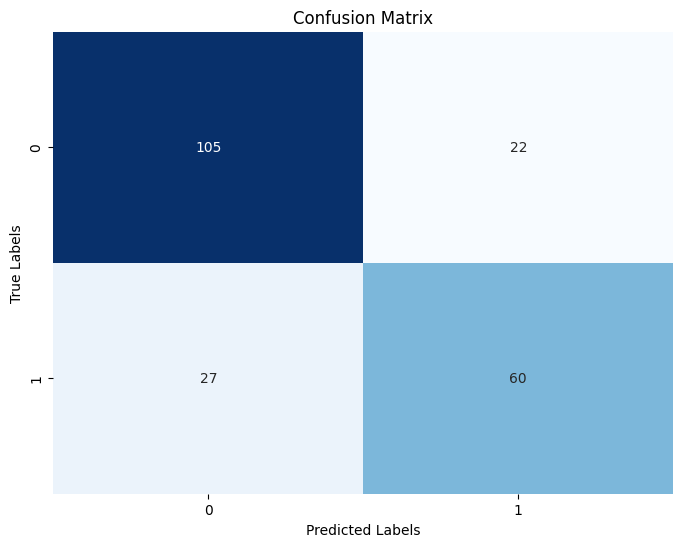

In [12]:
X2 = X[['female', 'Pclass']].copy()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, stratify=y, random_state=42)

X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

lr2 = LogisticRegression(random_state=41)
lr2.fit(X_train2, y_train2)
y_predict2 = lr2.predict(X_test2)
y_scores2 = lr2.predict_proba(X_test2)

print(roc_auc_score(y_test, y_scores2[:, 1]))
cm_lr = confusion_matrix(y_test2, y_predict2)
print_confusion_matrix(cm_lr)

Model built on this 2 features has better accuracy and it is equal to 81%, while it was 78% for the first model.

In [13]:
# data for roc curve at the end
clf_lr = LogisticRegression(random_state=41)
clf_lr.fit(X_train,y_train)
y_predict_lr = clf_lr.predict(X_test)
y_scores_lr = clf_lr.predict_proba(X_test)
auc_lr = roc_auc_score(y_test, y_scores_lr[:, 1])
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, y_scores_lr[:, 1])
f1_lr = f1_score(y_test, y_predict_lr)

## KNN

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_predict_knn = knn.predict(X_test)
print(accuracy_score(y_test, y_predict))

0.780373831775701


The k-nearest neighbors (KNN) classifier achieved an accuracy of 78%, which is a strong result. The confusion matrix below confirms that the model is performing well, showing a good balance in classification. Now, I'll use GridSearchCV to find the optimal value for the number of neighbors (n_neighbors) to improve the model further.

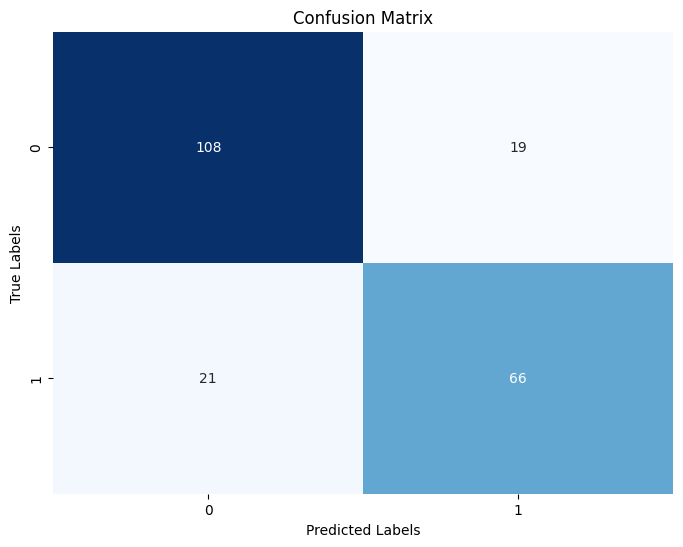

In [15]:
print_confusion_matrix(confusion_matrix(y_test, y_predict_knn))

In [16]:
n_neighbors = list(range(1, 16))
knn_parameters = {
    'n_neighbors': n_neighbors
}
best_param_knn = GridSearchCV(KNeighborsClassifier(), knn_parameters, cv=5)
best_param_knn.fit(X_train, y_train)

C:\Users\diana\PycharmProjects\titanic\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]})

(1.0, 15.0)

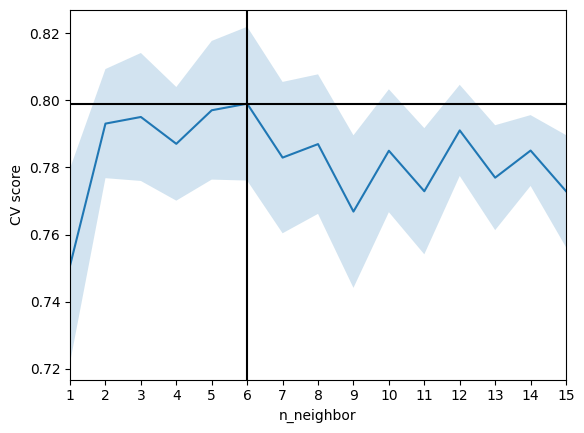

In [17]:
knn_scores = best_param_knn.cv_results_["mean_test_score"]
knn_scores_std = best_param_knn.cv_results_["std_test_score"]

plt.plot(n_neighbors, knn_scores)

std_error = knn_scores_std / np.sqrt(5)

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(n_neighbors, knn_scores + std_error, knn_scores - std_error, alpha=0.2)

plt.ylabel("CV score")
plt.xlabel("n_neighbor")
plt.axhline(np.max(knn_scores), color='k')
plt.axvline(6, color='k')
plt.xticks(n_neighbors)
plt.xlim([n_neighbors[0], n_neighbors[-1]])

0.7990654205607477


Text(0.5, 1.0, 'ROC Curve for KNN(k = 6)')

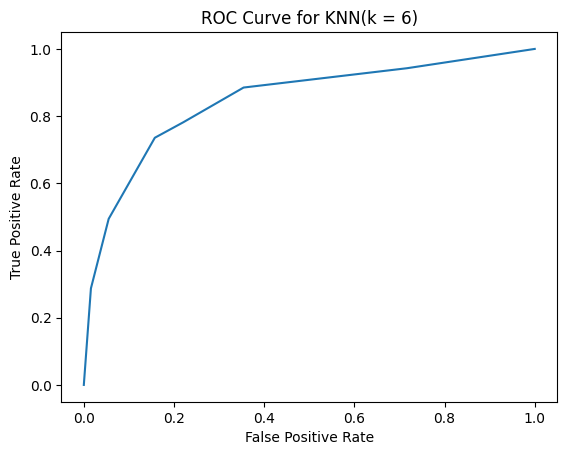

In [18]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)
y_predict_knn = knn.predict(X_test)
print(accuracy_score(y_test, y_predict_knn))

y_scores_knn = knn.predict_proba(X_test)
auc_knn = roc_auc_score(y_test, y_scores_knn[:, 1])
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test, y_scores_knn[:, 1])
plt.plot(fpr_knn, tpr_knn, label="ROC curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for KNN(k = 6)')

After optimisation, the accuracy for the KNN model is 80%.

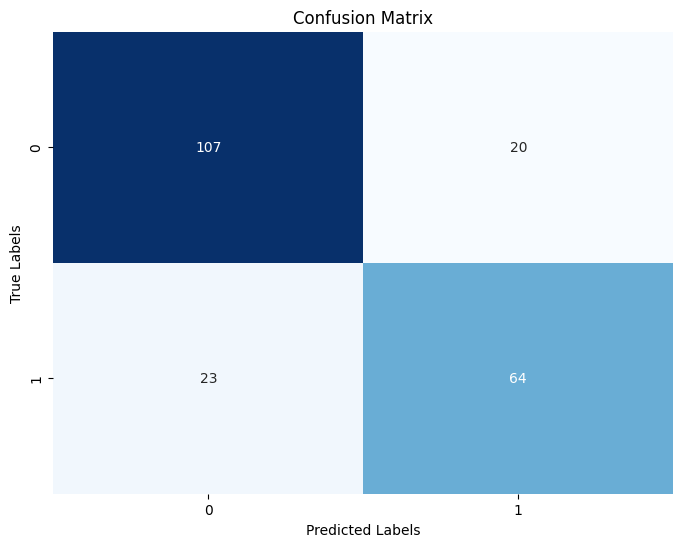

In [19]:
f1_knn = f1_score(y_test, y_predict_knn)
print_confusion_matrix(confusion_matrix(y_test, y_predict_knn)) 

## SVM

Results for SVM method:
0.8514056224899599 0.8130841121495327


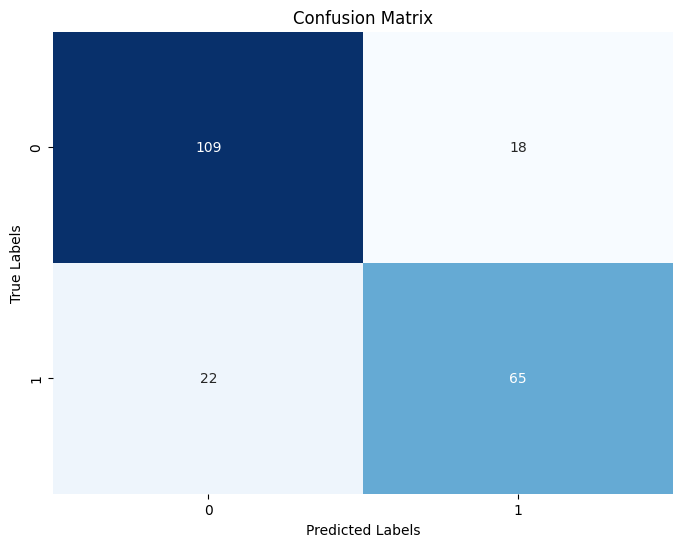

In [20]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_predict_svm = svm.predict(X_test)
print("Results for SVM method:")
print(svm.score(X_train, y_train), svm.score(X_test, y_test))
cm_svm = confusion_matrix(y_test, y_predict_svm)
print_confusion_matrix(cm_svm)

Output: Accuracy for training set is equal 85% and for test set- 81%. What is quite good score, but try now to optimization parameters

In [ ]:
NUM_TRIALS = 10

parameters = {
    'C': [1, 5, 10, 15, 20, 25],
    'gamma': [1, 0.1, 0.001]
}

svm = SVC(random_state=42)
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)
best_params = np.zeros((NUM_TRIALS, 2))

# Loop for each trial
for i in range(NUM_TRIALS):
    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Nested CV with parameter optimization
    clf_gs = GridSearchCV(estimator=svm, param_grid=parameters, cv=inner_cv)
    nested_score = cross_val_score(clf_gs, X=X_train, y=y_train, cv=outer_cv)
    nested_scores[i] = nested_score.mean()
    params = clf_gs.fit(X_train, y_train).best_params_
    best_params[i, 0] = params['C']
    best_params[i, 1] = params['gamma']

print(best_params)
# svm = SVC(random_state=42)
# best_param = GridSearchCV(svm, parameters)
# best_param.fit(X_train, y_train)
# print(best_param.best_params_)

C:\Users\diana\PycharmProjects\titanic\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# print(best_params, nested_scores)
best_parameters_for_svm = pd.DataFrame(best_params, columns=['C', 'gamma'])
best_parameters_for_svm['score'] = pd.DataFrame(nested_scores)
best_parameters_for_svm = best_parameters_for_svm.sort_values(by='score', ascending=False)
best_parameters_for_svm

There isn't big difference in score depending on the parameter 'C'. I choose values for 'C' 10 and for 'gamma' 0.1. 
Now, let's examine the confusion matrix.

In [ ]:
svm = SVC(random_state=41, C=10, gamma=0.1)
svm.fit(X_train, y_train)
y_predict_svm = svm.predict(X_test)
print("Results for SVM method:")
print(svm.score(X_train, y_train), svm.score(X_test, y_test))
cm_svm = confusion_matrix(y_test, y_predict_svm)
print_confusion_matrix(confusion_matrix(y_test, y_predict_knn)) 

In [ ]:
# data for roc curve at the end
clf_svm = SVC(probability=True, random_state=42, C=10, gamma=0.1)
clf_svm.fit(X_train,y_train)
y_predict_svm = clf_svm.predict(X_test)
y_scores_svm = clf_svm.predict_proba(X_test)
auc_svm = roc_auc_score(y_test, y_scores_svm[:, 1])
fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, y_scores_svm[:, 1])
f1_svm = f1_score(y_test, y_predict_svm)

## Decision tree

In [ ]:
tree_clf = tree.DecisionTreeClassifier(random_state=41)
tree_clf = tree_clf.fit(X_train, y_train)
y_predict_tree = tree_clf.predict(X_test)
print("Output for decision tree:")
print(tree_clf.score(X_train, y_train), tree_clf.score(X_test, y_test))
print_confusion_matrix(confusion_matrix(y_test, y_predict_tree))

Accuracy for training set is equal 98% and for test set- 74%. This mean that model is overfitted

In [ ]:
tree.plot_tree(tree_clf)
plt.show()

Looking at the graph is understandable, because it was created too many leafs.

In [ ]:
best_tree = [0, 0]
train_accuracies = []
test_accuracies = []
depth = [2, 3, 4, 5, 6, 7, 8]

for i in depth:
    tree_clf = tree.DecisionTreeClassifier(random_state=41, max_depth=i)
    tree_clf = tree_clf.fit(X_train, y_train)
    train_accuracy = tree_clf.score(X_train, y_train)
    y_predict_tree = tree_clf.predict(X_test)
    test_accuracy = tree_clf.score(X_test, y_test)
    if test_accuracy > best_tree[0]:
        best_tree[0] = test_accuracy
        best_tree[1] = i
    print(f"Output for decision tree that has max_depth = {i}:")
    print(tree_clf.score(X_train, y_train), test_accuracy)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

print(f"The highest accuracy for testing set is for model with "
      f"max_depth = {best_tree[1]} and it is equal: {best_tree[0]})")

plt.plot(depth, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(depth, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs Max Depth")
plt.legend()
plt.grid(True)
plt.show()

The highest accuracy for testing dataset is when max_depth parameter is equal 4, what we can easily see in the graph above, and it is equal 81%.

In [ ]:
# data for roc curve at the end
tree_clf = tree.DecisionTreeClassifier(random_state=41, max_depth=4)
tree_clf = tree_clf.fit(X_train, y_train)
y_predict_tree = tree_clf.predict(X_test)
y_scores_tree = tree_clf.predict_proba(X_test)
auc_tree = roc_auc_score(y_test, y_scores_tree[:, 1])
fpr_tree, tpr_tree, threshold_tree = roc_curve(y_test, y_scores_tree[:, 1])
f1_tree = f1_score(y_test, y_predict_tree)

## Random forest

In [ ]:
random_forest_clf = RandomForestClassifier(max_depth=3, random_state=41)
random_forest_clf.fit(X_train, y_train)
y_predict_random_forest = random_forest_clf.predict(X_test)
print("Output for random forest:")
print(random_forest_clf.score(X_train, y_train), random_forest_clf.score(X_test, y_test))
print_confusion_matrix(confusion_matrix(y_test, y_predict_random_forest))

Currently, the model achieves 82% accuracy on the training set and 79% on the test set. 

In [ ]:
rf_params = {'n_estimators': [50, 100],
             'max_depth': [2, 3, 4, 5, 6]}

cv_rf = KFold(n_splits=4, shuffle=True, random_state=0)

best_params_rf = GridSearchCV(random_forest_clf, rf_params,
        return_train_score=True,
        cv=cv_rf).fit(X_train, y_train)
print("The best parameters found by GridSearchCV for random forest:")
print(best_params_rf.best_params_)
print(best_params_rf.best_score_)
best_random_forest_clf = RandomForestClassifier(max_depth=4, n_estimators=50, random_state=41)
best_random_forest_clf.fit(X_train, y_train)
y_predict_best_random_forest = best_random_forest_clf.predict(X_test)
print(best_random_forest_clf.score(X_train, y_train), best_random_forest_clf.score(X_test, y_test))

With optimization, the model now reaches 85% accuracy on the training set and 80% on the test set.

In [ ]:
# data for roc curve at the end
clf_rf = RandomForestClassifier(max_depth=4, n_estimators=50, random_state=41)
clr_rf = clf_rf.fit(X_train, y_train)
y_predict_rf = clf_rf.predict(X_test)
y_scores_rf = clf_rf.predict_proba(X_test)
auc_rf = roc_auc_score(y_test, y_scores_rf[:, 1])
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, y_scores_rf[:, 1])
f1_rf = f1_score(y_test, y_predict_rf)

## Gradient boosting classifier

In [ ]:
gbc = GradientBoostingClassifier(max_depth=3, random_state=41)
gbc.fit(X_train, y_train)
y_predict_gbc = gbc.predict(X_test)
print("Gradient Boosting Classifier")
print("Accuracy for training set and test set:")
print(gbc.score(X_train, y_train), gbc.score(X_test, y_test))

Model probably is overfitted.

In [ ]:
gbc1 = GradientBoostingClassifier(max_depth=1, random_state=41)
gbc1.fit(X_train, y_train)
y_predict_gbc1 = gbc1.predict(X_test)
print("Gradient Boosting Classifier")
print("Accuracy for training set and test set:")
print(gbc1.score(X_train, y_train), gbc1.score(X_test, y_test))

In [ ]:
# data for roc curve at the end
clf_gbc = GradientBoostingClassifier(max_depth=1, random_state=42)
clf_gbc.fit(X_train, y_train)
y_predict_gbc = clf_gbc.predict(X_test)
y_scores_gbc = clf_gbc.predict_proba(X_test)
auc_gbc = roc_auc_score(y_test, y_scores_gbc[:, 1])
fpr_gbc, tpr_gbc, threshold_gbc = roc_curve(y_test, y_scores_gbc[:, 1])
f1_gbc = f1_score(y_test, y_predict_gbc)

## Model comparison

In [ ]:
plt.plot(fpr_lr, tpr_lr, label='Logistic regression')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot(fpr_tree, tpr_tree, label='Decision tree')
plt.plot(fpr_rf, tpr_rf, label='Random forest')
plt.plot(fpr_gbc, tpr_gbc, label='Gradient Boosting')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.title('ROC Curve')

In [ ]:
auc_scores = [['Linear regression',auc_lr], 
            ['KNN', auc_knn],
            ['SVM', auc_svm],
            ['Decision tree', auc_tree],
            ['Random forest', auc_rf],
            ['Gradient Boosting', auc_gbc]]
auc_df = pd.DataFrame(auc_scores, columns=['Method', 'AUC'])
auc_df = auc_df.sort_values(by='AUC', ascending=False)
auc_df

Looking at the table we see that the area under the graph is very similar in each method.

Beyond AUC measure I can also use F1 score, which is the harmonic mean of precision and recall.

In [ ]:
f1_scores = [f1_lr, f1_knn, f1_svm, f1_tree, f1_rf, f1_gbc]
f1_scores = pd.DataFrame(f1_scores, columns=['F1 score'], 
                         index=['Linear regression', 'KNN', 'SVM', 'Decision tree', 'Random forest', 'Gradient boost'])
f1_scores = f1_scores.sort_values(by='F1 score', ascending=False)
f1_scores

Also f1 scores are similar.
In summary, the best methods are K-nearest neighbours and Gradient boost.